In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aeon-essays-dataset/essays.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [4]:
df = pd.read_csv('/kaggle/input/aeon-essays-dataset/essays.csv')
df.head()

,title,description,essay,authors,source_url,thumbnail_url
0,Space exploration,When self-replicating craft bring life to the ...,"Some time late this century, someone will push...",Jay Olson,https://aeon.co//essays/cosmic-expansion-is-a-...,https://images.aeonmedia.co/images/9239658f-b9...
1,History of science,"To the detriment of the public, scientists and...",Would boycotting Russian scientists be an effe...,Lorraine Daston & Peter Harrison,https://aeon.co//essays/science-and-history-ca...,https://images.aeonmedia.co/images/7e9ea9e3-03...
2,Religion,"Once a centre of Afghan culture, Sufism seems ...",My introduction into the world of Afghanistan’...,Annika Schmeding,https://aeon.co//essays/sufi-transitions-betwe...,https://images.aeonmedia.co/images/957fb6c9-40...
3,Thinkers and theories,The intrepid logician Kurt Gödel believed in t...,"As the foremost logician of the 20th century, ...",Alexander T Englert,https://aeon.co//essays/kurt-godel-his-mother-...,https://images.aeonmedia.co/images/cbe24f46-98...
4,Thinkers and theories,"For Rachel Bespaloff, philosophy was a sensual...",Shortly after Rachel Bespaloff’s suicide in 19...,Isabel Jacobs,https://aeon.co//essays/for-rachel-bespaloff-p...,https://images.aeonmedia.co/images/536e31b1-dc...


In [5]:
df.columns

Index(['title', 'description', 'essay', 'authors', 'source_url',
       'thumbnail_url'],
      dtype='object')

In [6]:
df = df[['title', 'essay']].dropna()
df = df[df['essay'].str.len() > 100]  # Remove very short essays

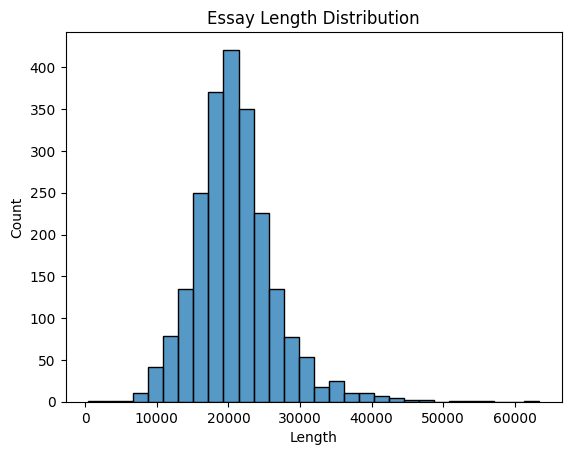

In [7]:
df['length'] = df['essay'].str.len()
sns.histplot(df['length'], bins=30)
plt.title('Essay Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

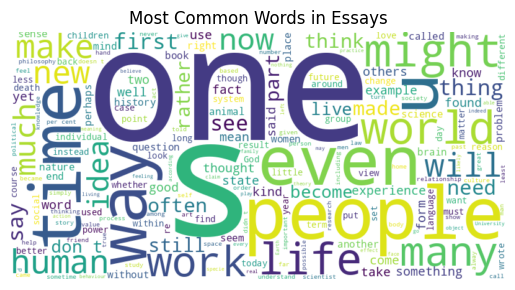

In [8]:
text = ' '.join(df['essay'].values)
wc = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Essays')
plt.show()

In [9]:
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf.fit_transform(df['essay'])

In [10]:
model = KMeans(n_clusters=5, random_state=42)
df['cluster'] = model.fit_predict(X)

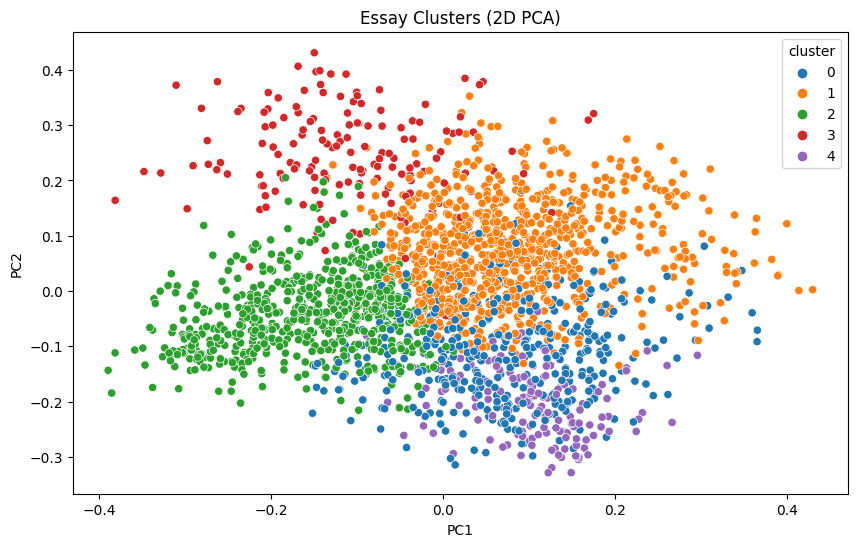

In [11]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df['cluster'], palette='tab10')
plt.title('Essay Clusters (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [12]:
for i in range(5):
    print(f"\n📚 Cluster {i}:")
    print(df[df['cluster'] == i]['title'].head(3).to_string(index=False))


📚 Cluster 0:
        Space exploration
Earth science and climate
             Anthropology

📚 Cluster 1:
 Thinkers and theories
Stories and literature
    Philosophy of mind

📚 Cluster 2:
             Religion
Thinkers and theories
         Architecture

📚 Cluster 3:
              Bioethics
    Illness and disease
Film and visual culture

📚 Cluster 4:
   History of science
          Metaphysics
Logic and probability
